In [ ]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [ ]:
csv_dir_treinamento = "/content/sample_data/geral.csv"
data_treino = pd.read_csv(csv_dir_treinamento, delimiter=";")

In [ ]:
treinamento_classification = data_treino['conc']
data_treino.drop(["conc"], axis=1, inplace=True)
data_treino.drop(["Exemplo"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data_treino, columns=['Cliente', 'Preço', 'Tipo', 'Tempo'])

In [ ]:
labelencoder =  preprocessing.LabelEncoder()
treinamento_dados['Alternativo'] = labelencoder.fit_transform(treinamento_dados['Alternativo'])
treinamento_dados['Bar'] = labelencoder.fit_transform(treinamento_dados['Bar'])
treinamento_dados['Sex/Sab'] = labelencoder.fit_transform(treinamento_dados['Sex/Sab'])
treinamento_dados['fome'] = labelencoder.fit_transform(treinamento_dados['fome'])
treinamento_dados['Chuva'] = labelencoder.fit_transform(treinamento_dados['Chuva'])
treinamento_dados['Res'] = labelencoder.fit_transform(treinamento_dados['Res'])

In [ ]:
from sklearn.model_selection import train_test_split
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

In [ ]:
tree_restaurant = DecisionTreeClassifier(criterion="entropy")
tree_restaurant.fit(dataset_treino, dataset_treino_class)

DecisionTreeClassifier(criterion='entropy')

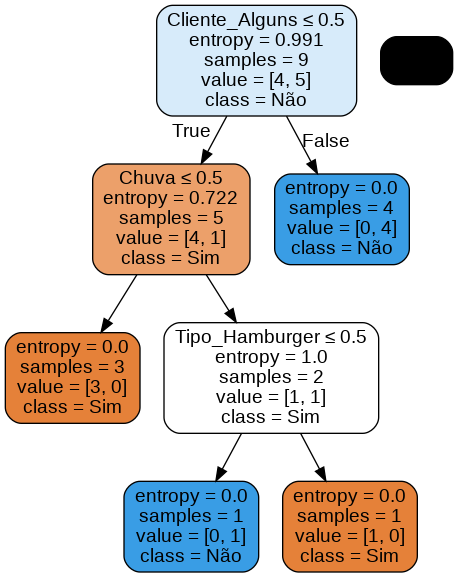

In [ ]:
dot_data = tree.export_graphviz(tree_restaurant, out_file=None,feature_names=dataset_treino.columns.values,class_names=treinamento_classification.unique(),filled=True, rounded=True,special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('restaurante.png')

from IPython.display import Image
Image(filename='restaurante.png')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

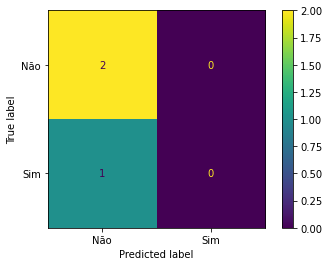

In [ ]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_restaurant.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print("Score = ", accuracy_score(dataset_teste_class, tree_restaurant.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, tree_restaurant.predict(dataset_teste)))

tn, fp, fn, tp = confusion_matrix(dataset_teste_class, tree_restaurant.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp)
fpr = fp / (tn + fp)
fnr = fn / (fn + tp) 
tpr = tp / (tp + fn) 
print('verdadeiro negativo: ' + str(tnr))
print('falso positivo: ' + str(fpr))
print('falso negativo: ' + str(fnr))
print('verdadeiro positivo: ' + str(tpr))

Score =  0.6666666666666666


              precision    recall  f1-score   support

         Não       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

verdadeiro negativo: 1.0
falso positivo: 0.0
falso negativo: 1.0
verdadeiro positivo: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
